### Use LSTMs for predicting the Up/Down of stocks of IBM for the year 2017

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

In [0]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [26]:
# First, we get the data
dataset = pd.read_csv('IBM.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [27]:
dataset.shape

(3020, 6)

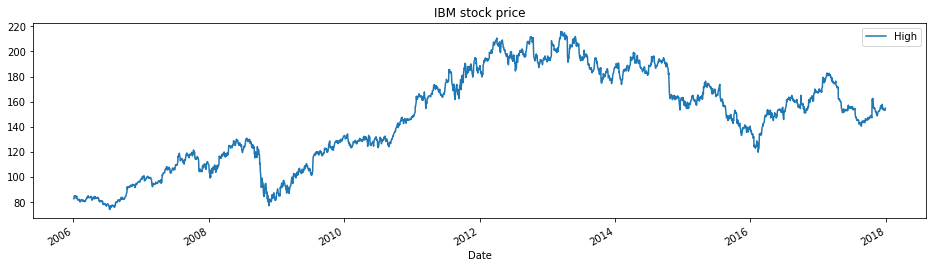

In [28]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"].plot(figsize=(16,4),legend=True)
plt.title('IBM stock price')
plt.show()

In [29]:
price = dataset[['High']].values
price.shape[0]

3020

In [0]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of data set, we have 60 previous timesteps' elements 
x = []
y = []
for i in range(60,price.shape[0]):
    x.append(price[i-60:i,0])
    y.append(int(price[i,0] > price[i-1,0]))
x, y = np.array(x), np.array(y)

In [0]:
# Split train and test (first 70% as train, last 30% as test)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    shuffle = False,
                                                    test_size = 0.3)

In [0]:
# Scaling the input
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [33]:
x_train.shape

(2072, 60)

In [0]:
# Reshaping X_train for efficient modelling
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [35]:
# N * T * F
x_train.shape

(2072, 60, 1)

In [36]:
y_train

array([1, 0, 0, ..., 1, 0, 0])

In [0]:
# The LSTM architecture
model = Sequential()
# First LSTM layer
model.add(LSTM(50, input_shape=(60, 1)))

# The output layer
model.add(Dense(1))

In [0]:
# Compiling the RNN
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = 'accuracy')

In [39]:
# Fitting to the training set
history = model.fit(x_train,y_train,
          epochs=25,
          validation_split = 0.3)

Epoch 1/25
46/46 [==============================] - 2s 33ms/step - loss: 0.8710 - accuracy: 0.4952 - val_loss: 0.9561 - val_accuracy: 0.5032
Epoch 2/25
46/46 [==============================] - 1s 29ms/step - loss: 0.7170 - accuracy: 0.5172 - val_loss: 0.8486 - val_accuracy: 0.5032
Epoch 3/25
46/46 [==============================] - 1s 27ms/step - loss: 0.6999 - accuracy: 0.5152 - val_loss: 0.7167 - val_accuracy: 0.5032
Epoch 4/25
46/46 [==============================] - 1s 28ms/step - loss: 0.7025 - accuracy: 0.4800 - val_loss: 0.7138 - val_accuracy: 0.5032
Epoch 5/25
46/46 [==============================] - 1s 28ms/step - loss: 0.6977 - accuracy: 0.5186 - val_loss: 0.6939 - val_accuracy: 0.5032
Epoch 6/25
46/46 [==============================] - 1s 28ms/step - loss: 0.6988 - accuracy: 0.4903 - val_loss: 0.6961 - val_accuracy: 0.5032
Epoch 7/25
46/46 [==============================] - 1s 28ms/step - loss: 0.6990 - accuracy: 0.5097 - val_loss: 0.7007 - val_accuracy: 0.5032
Epoch 8/25
46

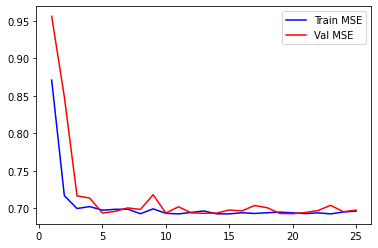

In [40]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss,'b',label='Train MSE')
plt.plot(epochs, val_loss,'r',label='Val MSE')
plt.legend()
plt.show()

In [0]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [42]:
# Accuracy is low as the model is very simple and stock price is difficult to predict
model.evaluate(x_test, y_test)

28/28 [==============================] - 0s 7ms/step - loss: 0.7056 - accuracy: 0.4752


[0.7056024670600891, 0.4752252399921417]

In [0]:
y_pred = model.predict(x_test)

In [0]:
y_pred = np.round(y_pred)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4752252252252252